# Compound model
We want to concatenate the different models.
For example:

Client---[CG]--(RTT:1ms, p = 0.0000001)----Gateway-----------[SAT]---(RTT: 500ms, p=0.0005)----------Terminal----[TS]---(RTT: 25ms, p = 0.0000001)-------Server

vs 

Client---[CS]--(RTT: 526ms,p=0.0005)-------Server

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging, sys
from ccaModels import CCA_MarkovChain_CUBIC_bit, CCA_MarkovChain_Hybla_bit
from compoundModels import ISP_Compound
import copy

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
C = 1000
# goodput ratio on the qpep link
goodputRatio = 0.95
logging.basicConfig(stream=sys.stderr, level=logging.INFO)

# CG = CCA_MarkovChain_CUBIC_OG(RTT_real = 0.01,packet_err = 1e-6)
# SAT = CCA_MarkovChain_CUBIC_OG(RTT_real = 0.5,packet_err = 1e-4)
# TS = CCA_MarkovChain_CUBIC_OG(RTT_real = 0.025, packet_err = 1e-6)

CG = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.01,packet_err = 1e-6)
SAT_Hyb = CCA_MarkovChain_Hybla_discrete(RTT_real = 0.5,packet_err = 1e-4, RTT0= 0.025)
SAT_Cub = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.5, packet_err = 1.e-4)
TS = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.025, packet_err = 1e-6)

segmented = ISP_Compound(CG=CG,SAT = SAT_Hyb,TQ = TS, QS = TS, goodputRatio = goodputRatio)
print(segmented)
segmented.compute_throughput()
print("Bottleneck link and throughput",segmented.bottleNeck, segmented.min_throughput)
print("Goodput", segmented.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", segmented.time_to_transfer(filesize=1000))

print("_______________________________________________________________")
segmented = ISP_Compound(CG=CG,SAT = SAT_Hyb,TS = TS, goodputRatio = goodputRatio)
print(segmented)
segmented.compute_goodput()
print("Bottleneck link and goodput",segmented.bottleNeck, segmented.min_throughput)
print("Goodput", segmented.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", segmented.time_to_transfer(filesize=1000))

print("_______________________________________________________________")
segmented_cub = ISP_Compound(CG=CG,SAT = SAT_Cub,TS = TS, goodputRatio = goodputRatio)
print(segmented_cub)
segmented_cub.compute_throughput()
print("Bottleneck link and throughput",segmented_cub.bottleNeck, segmented_cub.min_throughput)
print("Goodput", segmented_cub.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", segmented_cub.time_to_transfer(filesize=1000))

print("_______________________________________________________________")
#Full connection
CS = CCA_MarkovChain_CUBIC_bit(RTT_real = 0.535, packet_err = 1.02e-4)
direct = ISP_Compound(CS = CS)
print(direct)
direct.compute_throughput()
print("Bottleneck link and throughput",direct.bottleNeck,direct.min_throughput)
print("Goodput",direct.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", direct.time_to_transfer(filesize=1000))

Client X-----CG: CUBIC-----X-----SAT: HYBLA-----X-----TQ: CUBIC-----X-----QS: CUBIC-----X Server
Bottleneck link and throughput SAT 844.7437203046401
Goodput 802.506534289408
Time to transfer a 1000MSS file (1Mbyte) 1.2460957727720756
_______________________________________________________________
Client X-----CG: CUBIC-----X-----SAT: HYBLA-----X-----TS: CUBIC-----X Server
Bottleneck link and throughput SAT 844.74372030464
Goodput 802.5065342894079
Time to transfer a 1000MSS file (1Mbyte) 1.2460957727720756
_______________________________________________________________
Client X-----CG: CUBIC-----X-----SAT: CUBIC-----X-----TS: CUBIC-----X Server
Bottleneck link and throughput SAT 732.0206597774842
Goodput 695.4196267886099
Time to transfer a 1000MSS file (1Mbyte) 1.437980697522037
_______________________________________________________________
Client X-----CS: CUBIC-----X Server
Bottleneck link and throughput CS 726.0215934302411
Goodput 726.0215934302411
Time to transfer a 1000MSS fil

In [3]:
# LEO comparison
C = 1000
# goodput ratio on the qpep link
goodputRatio = 0.95
logging.basicConfig(stream=sys.stderr, level=logging.INFO)

# CG = CCA_MarkovChain_CUBIC_OG(RTT_real = 0.01,packet_err = 1e-6)
# SAT = CCA_MarkovChain_CUBIC_OG(RTT_real = 0.5,packet_err = 1e-4)
# TS = CCA_MarkovChain_CUBIC_OG(RTT_real = 0.025, packet_err = 1e-6)

CG = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.01,packet_err = 1e-6)
SAT_Hyb = CCA_MarkovChain_Hybla_discrete(RTT_real = 0.1,packet_err = 1e-4, RTT0= 0.025)
SAT_Cub = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.1, packet_err = 1.e-4)
TS = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.025, packet_err = 1e-6)

segmented = ISP_Compound(CG=CG,SAT = SAT_Hyb,TQ = TS, QS = TS, goodputRatio = goodputRatio)
print(segmented)
segmented.compute_throughput()
print("Bottleneck link and throughput",segmented.bottleNeck, segmented.min_throughput)
print("Goodput", segmented.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", segmented.time_to_transfer(filesize=1000))

print("_______________________________________________________________")
segmented = ISP_Compound(CG=CG,SAT = SAT_Hyb,TS = TS, goodputRatio = goodputRatio)
print(segmented)
segmented.compute_throughput()
print("Bottleneck link and throughput",segmented.bottleNeck, segmented.min_throughput)
print("Goodput", segmented.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", segmented.time_to_transfer(filesize=1000))

print("_______________________________________________________________")
segmented_cub = ISP_Compound(CG=CG,SAT = SAT_Cub,TS = TS, goodputRatio = goodputRatio)
print(segmented_cub)
segmented_cub.compute_throughput()
print("Bottleneck link and throughput",segmented_cub.bottleNeck, segmented_cub.min_throughput)
print("Goodput", segmented_cub.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", segmented_cub.time_to_transfer(filesize=1000))

print("_______________________________________________________________")
#Full connection
CS = CCA_MarkovChain_CUBIC_discrete(RTT_real = 0.135, packet_err = 1.02e-4)
direct = ISP_Compound(CS = CS)
print(direct)
direct.compute_throughput()
print("Bottleneck link and throughput",direct.bottleNeck,direct.min_throughput)
print("Goodput",direct.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", direct.time_to_transfer(filesize=1000))

Client X-----CG: CUBIC-----X-----SAT: HYBLA-----X-----TQ: CUBIC-----X-----QS: CUBIC-----X Server
Bottleneck link and throughput SAT 844.667911794796
Goodput 802.4345162050562
Time to transfer a 1000MSS file (1Mbyte) 1.246207609225595
_______________________________________________________________
Client X-----CG: CUBIC-----X-----SAT: HYBLA-----X-----TS: CUBIC-----X Server
Bottleneck link and throughput SAT 844.667911794796
Goodput 802.4345162050562
Time to transfer a 1000MSS file (1Mbyte) 1.246207609225595
_______________________________________________________________
Client X-----CG: CUBIC-----X-----SAT: CUBIC-----X-----TS: CUBIC-----X Server
Bottleneck link and throughput SAT 796.1667895032477
Goodput 756.3584500280854
Time to transfer a 1000MSS file (1Mbyte) 1.3221244503355092
_______________________________________________________________
Client X-----CS: CUBIC-----X Server
Bottleneck link and throughput CS 783.4946736012189
Goodput 783.4946736012189
Time to transfer a 1000MSS fil

In [6]:
CG = CCA_MarkovChain_CUBIC_bit(RTT_real = 0.01,packet_err = 1e-6)
SAT_Hyb = CCA_MarkovChain_Hybla_bit(RTT_real = 0.1,packet_err = 1e-4, RTT0= 0.025)
SAT_Cub = CCA_MarkovChain_CUBIC_bit(RTT_real = 0.1, packet_err = 1.e-4)
TS = CCA_MarkovChain_CUBIC_bit(RTT_real = 0.01, packet_err = 1e-6)

goodputRatio = 1

segmented = ISP_Compound(CG=CG,SAT = SAT_Hyb,TQ = TS, goodputRatio = goodputRatio)
print(segmented)
segmented.compute_throughput()
print("Bottleneck link and throughput",segmented.bottleNeck, segmented.min_throughput)
print("Goodput", segmented.goodput())
print("Time to transfer a 1000MSS file (1Mbyte)", segmented.time_to_transfer(filesize=1000))
print("_______________________________________________________________")
single = CCA_MarkovChain_Hybla_bit(RTT_real = 0.3, packet_err = 1e-4)
single.compute_throughput()
print("Bottleneck link and throughput",)

Client X-----CG: CUBIC-----X-----SAT: HYBLA-----X-----TQ: CUBIC-----X Server
Bottleneck link and throughput SAT 0.8442123504335511
Goodput 0.8442123504335511
Time to transfer a 1000MSS file (1Mbyte) 1184.5360938944366
_______________________________________________________________


In [16]:
logging.basicConfig(stream=sys.stderr, level=logging.INFO)
sat_rtts = np.linspace(0.01,1,10)
single_sat_throughputs = np.zeros(sat_rtts.shape)
compound_sat_throughput = np.zeros(sat_rtts.shape)
compound_sat_throughput_cub = np.zeros(sat_rtts.shape)
bit_err = 1e-6
gateway_to_endhost_bep = 1e-12
gateway_to_endhost = 0.2
TS = CCA_MarkovChain_CUBIC_bit(RTT_real = gateway_to_endhost, packet_err = gateway_to_endhost_bep*(1500*8), N=130,C=83)
for i,rtt in enumerate(sat_rtts):
    single = CCA_MarkovChain_CUBIC_bit(RTT_real = rtt+gateway_to_endhost, packet_err = (bit_err+gateway_to_endhost_bep)*(1500*8), beta=0.7 ,N=130, C = 83)
    single.avg_throughput()
    single_sat_throughputs[i] = single.ssThroughput

    SAT_Hyb = CCA_MarkovChain_Hybla_bit(RTT_real = rtt,packet_err = bit_err*(1500*8)*10, RTT0= 0.05, beta=0.7 ,N=130, C = 83)
    segmented = ISP_Compound(SAT = SAT_Hyb,TS = TS,goodputRatio=0.95)
    compound_sat_throughput[i] = segmented.goodput()
    
    SAT_Cub = CCA_MarkovChain_CUBIC_bit(RTT_real = rtt, packet_err = bit_err*(1500*8), beta=0.7 ,N=130, C = 83)
    segmented_cub = ISP_Compound(SAT = SAT_Cub,TS = TS,goodputRatio=0.95)
    compound_sat_throughput_cub[i] = segmented_cub.goodput()
print(segmented)
print(segmented_cub)


In [94]:
logging.basicConfig(stream=sys.stderr, level=logging.INFO)
sat_rtts = np.linspace(0.01,1,30)
throughput = {"single":np.zeros((2,len(sat_rtts))),"compound_hyb":np.zeros((2,len(sat_rtts))),"compound_cub":np.zeros((2,len(sat_rtts)))}
bit_err = 1e-6
gateway_to_endhost_bep = 1e-12
goodputRatio = 1

for j,gateway_to_endhost in enumerate([0.1,0.4]):
    TS = CCA_MarkovChain_CUBIC_bit(RTT_real = gateway_to_endhost, packet_err = gateway_to_endhost_bep*(1500*8), N=130,C=83)
    for i,rtt in enumerate(sat_rtts):
        for scenario in throughput.keys():
            if scenario == "single":
                single = CCA_MarkovChain_CUBIC_bit(RTT_real = rtt+gateway_to_endhost, packet_err = (bit_err+gateway_to_endhost_bep)*(1500*8), beta=0.7 ,N=130, C = 83)
                single.avg_throughput()
                throughput[scenario][j,i] = single.ssThroughput
            elif scenario == "compound_hyb":
                SAT_Hyb = CCA_MarkovChain_Hybla_bit(RTT_real = rtt,packet_err = bit_err*(1500*8), RTT0= 0.05, beta=0.7 ,N=130, C = 83)
                segmented = ISP_Compound(SAT = SAT_Hyb,TS = TS, goodputRatio=goodputRatio)
                throughput[scenario][j,i] = segmented.compute_goodput()
            elif scenario == "compound_cub":
                SAT_Cub = CCA_MarkovChain_CUBIC_bit(RTT_real = rtt, packet_err = bit_err*(1500*8), beta=0.7 ,N=130, C = 83)
                segmented_cub = ISP_Compound(SAT = SAT_Cub,TS = TS, goodputRatio=goodputRatio)
                throughput[scenario][j,i] = segmented_cub.compute_goodput()
            else:
                print("Error: unknown scenario")
                sys.exit()

In [95]:
sat_rtts = np.linspace(0.01,1,30)
goodput = {"single":np.zeros((2,len(sat_rtts))),"compound_hyb":np.zeros((2,len(sat_rtts))),"compound_cub":np.zeros((2,len(sat_rtts)))}
bit_err = 1e-6
gateway_to_endhost_bep = 1e-12
goodputRatio = 0.95

for j,gateway_to_endhost in enumerate([0.1,0.4]):
    TS = CCA_MarkovChain_CUBIC_bit(RTT_real = gateway_to_endhost, packet_err = gateway_to_endhost_bep*(1500*8), N=130,C=83)
    for i,rtt in enumerate(sat_rtts):
        for scenario in goodput.keys():
            if scenario == "single":
                single = CCA_MarkovChain_CUBIC_bit(RTT_real = rtt+gateway_to_endhost, packet_err = (bit_err+gateway_to_endhost_bep)*(1500*8), beta=0.7 ,N=130, C = 83)
                single.avg_throughput()
                goodput[scenario][j,i] = single.ssThroughput
            elif scenario == "compound_hyb":
                SAT_Hyb = CCA_MarkovChain_Hybla_bit(RTT_real = rtt,packet_err = bit_err*(1500*8), RTT0= 0.05, beta=0.7 ,N=130, C = 83)
                segmented = ISP_Compound(SAT = SAT_Hyb,TS = TS, goodputRatio=goodputRatio)
                goodput[scenario][j,i] = segmented.compute_goodput()
            elif scenario == "compound_cub":
                SAT_Cub = CCA_MarkovChain_CUBIC_bit(RTT_real = rtt, packet_err = bit_err*(1500*8), beta=0.7 ,N=130, C = 83)
                segmented_cub = ISP_Compound(SAT = SAT_Cub,TS = TS, goodputRatio=goodputRatio)
                goodput[scenario][j,i] = segmented_cub.compute_goodput()
            else:
                print("Error: unknown scenario")
                sys.exit()

In [96]:
sat_rtts = np.linspace(0.01,1,30)
lossy = {"single":np.zeros((2,len(sat_rtts))),"compound_hyb":np.zeros((2,len(sat_rtts))),"compound_cub":np.zeros((2,len(sat_rtts)))}
bit_err = 1e-6
gateway_to_endhost_bep = 1e-6
goodputRatio = 1

for j,gateway_to_endhost in enumerate([0.1,0.4]):
    TS = CCA_MarkovChain_CUBIC_bit(RTT_real = gateway_to_endhost, packet_err = gateway_to_endhost_bep*(1500*8), N=130,C=83)
    for i,rtt in enumerate(sat_rtts):
        for scenario in lossy.keys():
            if scenario == "single":
                single = CCA_MarkovChain_CUBIC_bit(RTT_real = rtt+gateway_to_endhost, packet_err = (bit_err+gateway_to_endhost_bep)*(1500*8), beta=0.7 ,N=130, C = 83)
                single.avg_throughput()
                lossy[scenario][j,i] = single.ssThroughput
            elif scenario == "compound_hyb":
                SAT_Hyb = CCA_MarkovChain_Hybla_bit(RTT_real = rtt,packet_err = bit_err*(1500*8), RTT0= 0.05, beta=0.7 ,N=130, C = 83)
                segmented = ISP_Compound(SAT = SAT_Hyb,TS = TS, goodputRatio=goodputRatio)
                lossy[scenario][j,i] = segmented.compute_goodput()
            elif scenario == "compound_cub":
                SAT_Cub = CCA_MarkovChain_CUBIC_bit(RTT_real = rtt, packet_err = bit_err*(1500*8), beta=0.7 ,N=130, C = 83)
                segmented_cub = ISP_Compound(SAT = SAT_Cub,TS = TS, goodputRatio=goodputRatio)
                lossy[scenario][j,i] = segmented_cub.compute_goodput()
            else:
                print("Error: unknown scenario")
                sys.exit()

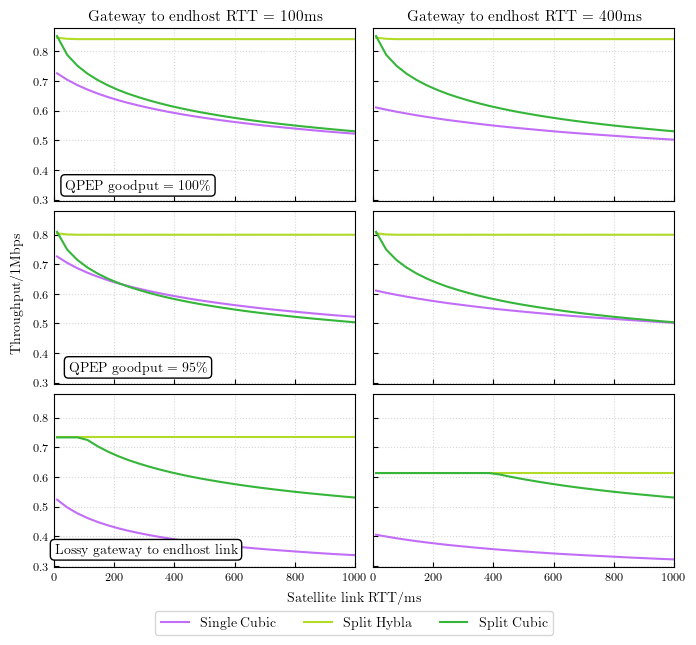

In [97]:
plt.rcParams.update({'text.usetex': True, "font.family": "Computer Modern Roman"})
props = dict(boxstyle='round', facecolor='white', alpha=1)

scenarios = ["Single Cubic","Split Hybla","Split Cubic"]
colours = ['#c26df7','#b1db27','#35b539']

fig, axs = plt.subplots(3,2,figsize=(8,7),sharey=True,sharex=True)
products = [throughput,goodput,lossy]
for i,product in enumerate(products):
    for j, gs_rtt in enumerate([0.01,0.4]):
        for k,scenario in enumerate(product.keys()):
            axs[i,j].plot((sat_rtts*1000).astype(int),product[scenario][j,:], label = scenarios[k],color=colours[k])
        #remove the xticks labels of all the plots exept the bottom one
        axs[i,j].tick_params(axis='x', which='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
        axs[i,j].tick_params(axis='y', which='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
        axs[i,j].set_xlim([0,1000])
        axs[i,j].grid()
    if i == 0:
        axs[i,0].set_title("Gateway to endhost RTT = 100ms", fontsize="11")
        axs[i,1].set_title("Gateway to endhost RTT = 400ms",fontsize="11")
lines, labels = axs[0,0].get_legend_handles_labels()
fig.legend(lines, labels,loc='center', markerscale=0.6, ncols=3, bbox_to_anchor=(0.5, 0.03),  fancybox=True)
fig.subplots_adjust(wspace=0.06, hspace=0.06)
fig.text(0.07, 0.5, 'Throughput/Mbps', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Satellite link RTT/ms', ha='center')
fig.text(0.23, 0.65, r'QPEP goodput = 100\%', ha='center',bbox=props)
fig.text(0.23, 0.39, r'QPEP goodput = 95\%', ha='center',bbox=props)
fig.text(0.24, 0.13, 'Lossy gateway to endhost link', ha='center',bbox=props)
plt.savefig('figures/split_model_results/hyblaAndCubicSplit.png', bbox_inches='tight', dpi=400)
plt.show()

3 pairs of plots: One without goodput, one with goodput, one with unreliable ground-link (with the same bep as the satellite link)

The difference between the satellite link rtt and the full connection rtt is less and less the satellite rtt grows. So both will tend to converge to each other. However if qpep adds some overhead the single link might become better than the qpep link.